<a href="https://colab.research.google.com/github/bachvu98/Policy-NLP/blob/master/Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
import re
import time
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from os import listdir
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from lxml import etree, html

%matplotlib inline
nltk.download('stopwords')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
segments = pd.read_csv('/content/drive/My Drive/OPP-115/OPP-115/segment_processed.csv',index_col=0)
segments.head()

,Policy UID,segment_id,category_name,segments
0,20,0,Other,strong privacy policy strong br br strong effe...
1,20,1,Other,privacy policy apply site maintained company o...
2,20,2,Policy Change,visiting site accepting practice described pri...
3,20,3,First Party Collection/Use,strong information collected strong br br coll...
4,20,4,First Party Collection/Use,strong personally identifiable information str...


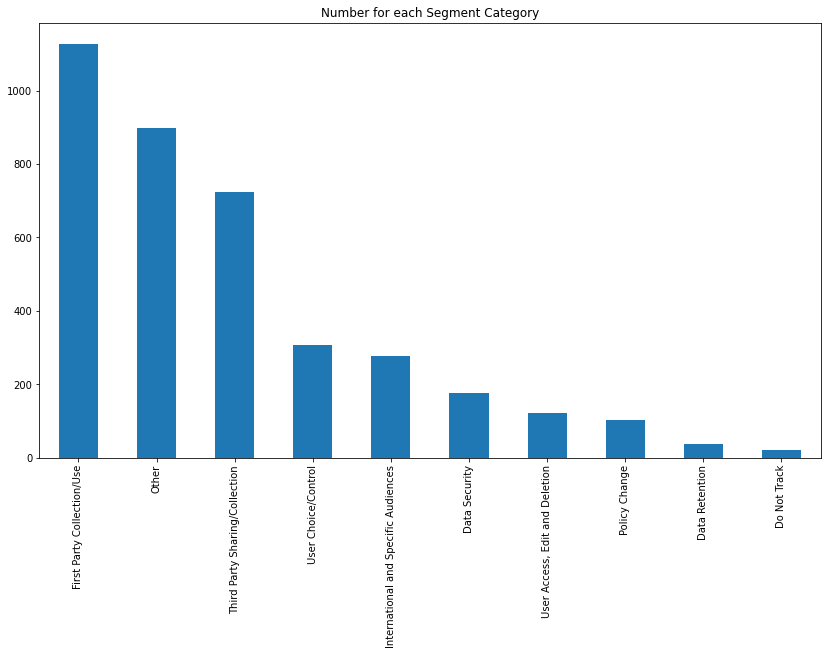

In [3]:
ax = segments['category_name'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Segment Category")

In [4]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid = tfid_vectorizer.fit(segments['segments'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

tfid_matrix = tfid_vectorizer.transform(segments['segments']).todense()
feature_names = tfid_vectorizer.get_feature_names()

# store the tf-idf array into pandas dataframe
df = pd.DataFrame(tfid_matrix, columns=feature_names)
df['output'] = segments['category_name']
df

,aaa,aaassuch,aad,abandoned,abc,abide,ability,abita,abitacom,able,abovedescribed,abovedesignated,abroad,absolute,abuse,abused,abusiness,abusive,academic,acc,accelerate,accept,acceptable,acceptance,accepted,accepting,accepts,access,accessed,accessibility,accessible,accessing,accessupdate,accident,accidental,accidentally,accommodate,accompanied,accompanies,accompanying,...,wwwthecarconnectioncom,wwwthedmaorg,wwwtrustecomwatchdog,wwwuhedu,wwwusplaystationcom,wwwvikingscom,xbox,xcompanycom,xi,xii,xiii,xiv,xp,xrated,xyz,xyzs,yahoo,year,yes,yet,york,youd,youll,young,younger,yourcaliforniaprivacyrightscom,youre,yourpersonally,yourschooledu,youtube,youve,zacks,zackscom,zealand,zero,zip,zipscene,zipscenecomprivacy,zone,output
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054918,0.0,0.0,0.0,0.066492,0.0,0.033387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy Change
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,First Party Collection/Use
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,First Party Collection/Use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.074102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
3788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
3789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
3790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,

In [18]:
kf = KFold(n_splits=5, random_state=0, shuffle=False)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [10]:
#Split data using 30%/70% split
segments_train, segments_test, targets_train, targets_test = train_test_split(df[feature_names], df['output'], test_size=0.3, random_state=0)

In [22]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
cross_val_score(classifier, segments_train, targets_train, cv=kf)

array([0.7306968 , 0.69679849, 0.75329567, 0.70809793, 0.74339623])

In [25]:
params = {
    'n_estimators': [50, 100, 200]
    }

grid_no_up = GridSearchCV(classifier, params, cv=kf).fit(segments_train, targets_train)

grid_no_up.best_score_


0.7264570230607966

In [27]:
accuracy_score(targets_test, grid_no_up.predict(segments_test))

0.718804920913884

In [28]:
from imblearn.over_sampling import SMOTE

In [51]:
grid_no_up.cv_results_

{'mean_fit_time': array([1.91212873, 3.64419303, 7.5130477 ]),
 'mean_score_time': array([0.03941603, 0.06050797, 0.09584208]),
 'mean_test_score': array([0.711384  , 0.72645702, 0.72305938]),
 'param_n_estimators': masked_array(data=[50, 100, 200],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 200}],
 'rank_test_score': array([3, 1, 2], dtype=int32),
 'split0_test_score': array([0.70998117, 0.7306968 , 0.7212806 ]),
 'split1_test_score': array([0.69491525, 0.69679849, 0.70998117]),
 'split2_test_score': array([0.74011299, 0.75329567, 0.74952919]),
 'split3_test_score': array([0.6873823 , 0.70809793, 0.71186441]),
 'split4_test_score': array([0.7245283 , 0.74339623, 0.72264151]),
 'std_fit_time': array([0.05940107, 0.25729683, 0.48226358]),
 'std_score_time': array([0.01006969, 0.00897824, 0.00384382]),
 'std_test_score': array([0.01922185, 0.02117503, 0.0141446

In [29]:
smote = SMOTE('minority', random_state=0)
segments_smote, targets_smote = smote.fit_sample(segments_train, targets_train)

for i in range(8):
  segments_smote, targets_smote = smote.fit_sample(segments_smote, targets_smote)
smote_df = pd.concat([pd.DataFrame(segments_smote, columns=feature_names), pd.DataFrame(targets_smote, columns=['output'])], axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [30]:
smote_df

,aaa,aaassuch,aad,abandoned,abc,abide,ability,abita,abitacom,able,abovedescribed,abovedesignated,abroad,absolute,abuse,abused,abusiness,abusive,academic,acc,accelerate,accept,acceptable,acceptance,accepted,accepting,accepts,access,accessed,accessibility,accessible,accessing,accessupdate,accident,accidental,accidentally,accommodate,accompanied,accompanies,accompanying,...,wwwthecarconnectioncom,wwwthedmaorg,wwwtrustecomwatchdog,wwwuhedu,wwwusplaystationcom,wwwvikingscom,xbox,xcompanycom,xi,xii,xiii,xiv,xp,xrated,xyz,xyzs,yahoo,year,yes,yet,york,youd,youll,young,younger,yourcaliforniaprivacyrightscom,youre,yourpersonally,yourschooledu,youtube,youve,zacks,zackscom,zealand,zero,zip,zipscene,zipscenecomprivacy,zone,output
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,International and Specific Audiences
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,First Party Collection/Use
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.096529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Third Party Sharing/Collection
4,0.0,0.0,0.0,0.0,0.0,0.260566,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Data Security
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7945,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
7946,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.209197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070244,0.0,0.0,0.0,0.0,0.201138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
7947,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032267,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
7948,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,

In [33]:
params = {
    'n_estimators': [50, 100, 200]
    }

grid_naive_up = GridSearchCV(classifier, params, cv=kf).fit(segments_smote, targets_smote)

grid_naive_up.best_score_

0.9168553459119497

In [49]:
grid_naive_up.cv_results_

{'mean_fit_time': array([ 4.86117325,  8.72393847, 17.3877902 ]),
 'mean_score_time': array([0.07701397, 0.12658982, 0.23027949]),
 'mean_test_score': array([0.90402516, 0.91106918, 0.91685535]),
 'param_n_estimators': masked_array(data=[50, 100, 200],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 200}],
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([0.80566038, 0.81320755, 0.81761006]),
 'split1_test_score': array([0.8754717 , 0.88050314, 0.88113208]),
 'split2_test_score': array([0.92641509, 0.92641509, 0.94402516]),
 'split3_test_score': array([0.95597484, 0.96981132, 0.97295597]),
 'split4_test_score': array([0.95660377, 0.96540881, 0.96855346]),
 'std_fit_time': array([0.76154287, 0.57385952, 1.22002929]),
 'std_score_time': array([0.01603936, 0.00774308, 0.01922418]),
 'std_test_score': array([0.05736814, 0.05856639, 0.0594

In [36]:
grid_naive_up.cv_results_['mean_test_score']


array([0.90402516, 0.91106918, 0.91685535])

In [37]:
grid_naive_up.best_params_


{'n_estimators': 200}

In [38]:
accuracy_score(targets_test, grid_naive_up.predict(segments_test))

0.7346221441124781

In [39]:
from imblearn.pipeline import Pipeline, make_pipeline


In [41]:
imba_pipeline = make_pipeline(SMOTE(random_state=0), 
                              RandomForestClassifier(n_estimators=100, random_state=0))
cross_val_score(imba_pipeline, segments_train, targets_train, cv=kf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

array([0.72881356, 0.72693032, 0.77212806, 0.72693032, 0.75283019])

In [42]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, return_train_score=True)
grid_imba.fit(segments_train, targets_train);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [43]:
grid_imba.best_params_


{'randomforestclassifier__n_estimators': 200}

In [44]:
grid_imba.best_score_


0.7513129374977793

In [45]:
accuracy_score(targets_test, grid_imba.predict(segments_test))

0.7442882249560633

In [50]:
grid_imba.cv_results_

{'mean_fit_time': array([11.36127172, 15.86374369, 24.38898854]),
 'mean_score_time': array([0.03464279, 0.05753922, 0.10198965]),
 'mean_test_score': array([0.73210745, 0.74152649, 0.75131294]),
 'mean_train_score': array([1., 1., 1.]),
 'param_randomforestclassifier__n_estimators': masked_array(data=[50, 100, 200],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'randomforestclassifier__n_estimators': 50},
  {'randomforestclassifier__n_estimators': 100},
  {'randomforestclassifier__n_estimators': 200}],
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([0.71751412, 0.72881356, 0.75517891]),
 'split0_train_score': array([1., 1., 1.]),
 'split1_test_score': array([0.72693032, 0.72693032, 0.73822976]),
 'split1_train_score': array([1., 1., 1.]),
 'split2_test_score': array([0.75706215, 0.77212806, 0.78531073]),
 'split2_train_score': array([1., 1., 1.]),
 'split3_test_score': array([0.71374765, 0.726

In [46]:
y_test_predict = grid_imba.best_estimator_.named_steps['randomforestclassifier'].predict(segments_test)
accuracy_score(targets_test, y_test_predict)

0.7442882249560633

In [33]:
from sklearn.multiclass import OneVsRestClassifier

#Set up an sklearn pipeline that processes policies, transforms them into a BOW model, applies TFIDF metric,
#then develops a Naive Bayes classifier.
text_clf= Pipeline([('vectorizer',CountVectorizer(ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer(use_idf=True)),
                    ('clf', svm.SVC())
                    ])

In [16]:
alpha_list1 = np.linspace(0.01, 1, 100)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [17]:
#paramater selection
start_time = time.time()

parameters = [{'C': [0.001, 0.01, 0.1, 1, 10],
              'degree': [2, 3, 4],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'gamma':  [0.001, 0.01, 0.1, 1, 10],
              }]

parameter_grid = [{"alpha":alpha_list1}]

classifier1 = MultinomialNB()

gs_clf = GridSearchCV(classifier1, parameter_grid, n_jobs=-1, cv=2, verbose=1)
gs_clf = gs_clf.fit(smote_df[feature_names],smote_df['output'])
train_time = time.time() - start_time
print('Done training in', train_time, 'seconds.')
print("Best parameter: ",gs_clf.best_params_)
print("Best score: ",gs_clf.best_score_) 

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   52.9s finished


Done training in 53.28182911872864 seconds.
Best parameter:  {'alpha': 0.01}
Best score:  0.9133333333333333


In [ ]:
results = pd.DataFrame()
# collect alpha list
results['alpha'] = gs_clf.cv_results_['clf__alpha'].data
# collect test scores
results['score'] = gs_clf.cv_results_['mean_test_score'].data

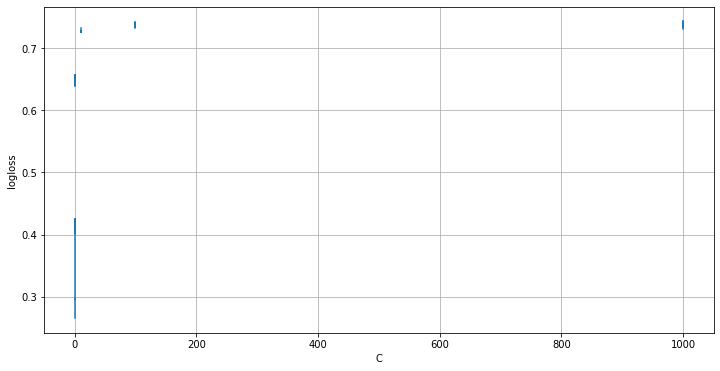

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results['alpha'], results['score'])
plt.xlabel('C')
plt.ylabel('logloss')
plt.grid()

In [38]:
text_clf_final= Pipeline([('vectorizer',CountVectorizer(ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer(use_idf=True)),
                    ('clf', svm.SVC(C = 10,
                         degree = 2,
                         gamma = 0.1,
                         kernel = 'rbf'))
                    ])

In [88]:
text_clf_final = SGDClassifier(loss='hinge', random_state=0)

In [67]:
text_clf_final = MultinomialNB(alpha = 0.005)

In [69]:
text_clf_final = svm.SVC(kernel='linear')

In [52]:
text_clf_final = grid_imba.best_estimator_
#text_clf_final.fit(segments_train,targets_train)
text_clf_final.fit(smote_df[feature_names],smote_df['output'])
preds = text_clf_final.predict(segments_test)
print('Accuracy =', np.mean(preds == targets_test))

Accuracy = 0.7346221441124781


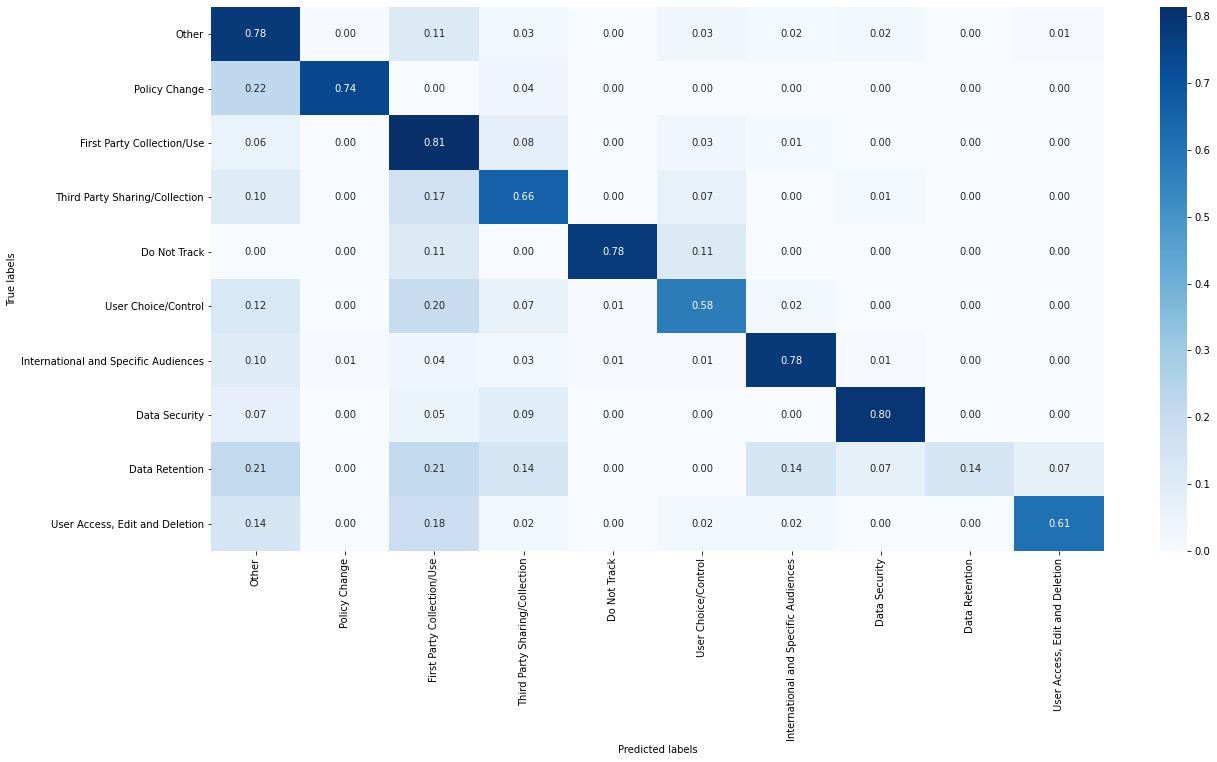

In [53]:
labels = segments['category_name'].unique()
cm = confusion_matrix(targets_test.astype(str), preds.astype(str), labels )
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.rcParams['figure.figsize'] = (20, 10)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=True, ax = ax)
ax.set_xticklabels([''] + labels, rotation=90)
ax.set_yticklabels([''] + labels, rotation=0)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [54]:
#Quick diagnostics
print(classification_report(targets_test.astype(str),preds.astype(str)))

                                      precision    recall  f1-score   support

                      Data Retention       0.67      0.14      0.24        14
                       Data Security       0.76      0.80      0.78        44
                        Do Not Track       0.78      0.78      0.78         9
          First Party Collection/Use       0.72      0.81      0.77       333
International and Specific Audiences       0.84      0.78      0.81        79
                               Other       0.72      0.78      0.75       264
                       Policy Change       0.91      0.74      0.82        27
      Third Party Sharing/Collection       0.75      0.66      0.70       229
      User Access, Edit and Deletion       0.88      0.61      0.72        49
                 User Choice/Control       0.58      0.58      0.58        90

                            accuracy                           0.73      1138
                           macro avg       0.76      0.67     